In [27]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_parquet("mnt-wl_data.parquet")
df

,M1RigidBodyMotions,M2RigidBodyMotions,OSSGIR6d,OSSPayloads6D,EncAvg
0,"[-9.830697037844944e-15, -3.122389979335797e-1...","[5.885044081528314e-12, -2.1616885666928376e-1...","[-1.921083920702748e-12, 9.73716680146713e-13,...","[1.7405228888994094e-11, 4.689811080282369e-12...","[0.0, 0.0, 0.0]"
1,"[-1.916926996740269e-09, -6.459566338616824e-0...","[-4.477346762723977e-08, 2.429892811244072e-08...","[2.220199048832797e-08, -2.2550794015969068e-0...","[6.459373721091804e-10, 9.332346636411465e-10,...","[-1.0569402671361038e-11, -8.95884652813459e-1..."
2,"[-1.8954348080142897e-09, -6.4645518532001655e...","[-4.4709101179547264e-08, 2.4135405989671874e-...","[2.2172699376795545e-08, -2.2519374789164382e-...","[7.064583885579394e-10, 9.304691729370512e-10,...","[-5.0900348449713045e-11, 4.349148599587282e-1..."
3,"[-1.7939226731621722e-09, -6.469799094391376e-...","[-4.445663938395572e-08, 2.3878057697862334e-0...","[2.2046073527924727e-08, -2.2344614033812032e-...","[7.874867683996099e-10, 8.721379435689809e-10,...","[-9.654890218409532e-11, 8.50079196374055e-12,..."
4,"[-1.572668772033784e-09, -6.469308000295061e-0...","[-4.3927486685013454e-08, 2.3493929587306744e-...","[2.1776054906339974e-08, -2.1955367030195998e-...","[8.966487695595302e-10, 7.183579269254205e-10,...","[-1.5200130166702153e-10, -3.111845732578155e-..."
...,...,...,...,...,...
39995,"[-8.547664165244819e-07, 3.380889790848645e-06...","[-6.918457360867879e-06, -2.5388515488711197e-...","[-5.439846731914762e-07, 8.888138076707782e-08...","[-4.849520937305896e-07, 3.1399661724500554e-0...","[-8.42891128606261e-09, 1.5429410522361126e-08..."
39996,"[-8.581187602563549e-07, 3.3794485229901826e-0...","[-6.9300589693419596e-06, -2.5381776663498474e...","[-5.439880352873538e-07, 9.132488496901494e-08...","[-4.853997200837989e-07, 3.155501840499717e-07...","[-8.467344370278523e-09, 1.5082346063714043e-0..."
39997,"[-8.614780091791194e-07, 3.378067367263989e-06...","[-6.9417972590189e-06, -2.537504087112223e-05,...","[-5.439574925472573e-07, 9.375549083673129e-08...","[-4.858430302286484e-07, 3.1712932805384925e-0...","[-8.504197408613996e-09, 1.4734127506659711e-0..."
39998,"[-8.648157417287845e-07, 3.376502554001808e-06...","[-6.953538938140692e-06, -2.5367607572338208e-...","[-5.43886774503917e-07, 9.618047448325975e-08,...","[-4.862750174323359e-07, 3.1858017440077775e-0...","[-8.53977129059422e-09, 1.4384241201501163e-08..."


In [49]:
t = np.arange(len(df))/1000
m1_rbm = np.vstack(df["M1RigidBodyMotions"])
m2_rbm = np.vstack(df["M2RigidBodyMotions"])
mnt_enc_avg = np.vstack(df["EncAvg"])
gir_mean = np.vstack(df["OSSGIR6d"])
#dg_6d = np.vstack(df["OSSPayloads6D"])

Mount motion

Text(0.5, 0, 'Time [s]')

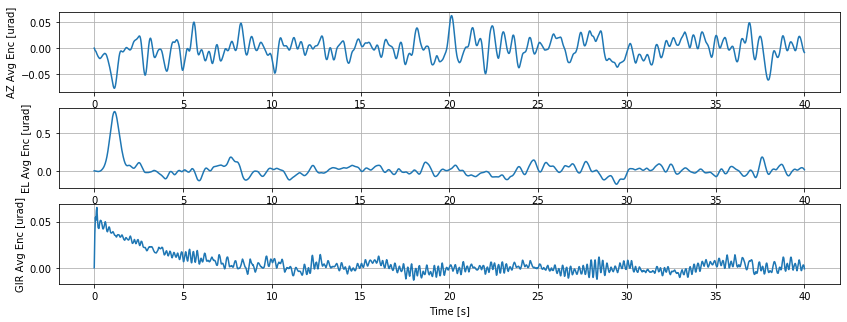

In [54]:
i1,i2 = 0, 39999#14999, 24000
fig,[ax1,ax2,ax3] = plt.subplots(3,1, figsize=(14,5))
ax1.plot(t[i1:i2],mnt_enc_avg[i1:i2,0]*1e6,label="AZ enc AVG")
ax1.grid()
ax1.set_ylabel("AZ Avg Enc [urad]")
ax2.plot(t[i1:i2],mnt_enc_avg[i1:i2,1]*1e6,label="EL enc AVG")
ax2.grid()
ax2.set_ylabel("EL Avg Enc [urad]")
ax3.plot(t[i1:i2],mnt_enc_avg[i1:i2,2]*1e6,label="GIR enc AVG")
ax3.grid()
ax3.set_ylabel("GIR Avg Enc [urad]")
ax3.set_xlabel("Time [s]")

M1-S7 and GIR RBM comparisons

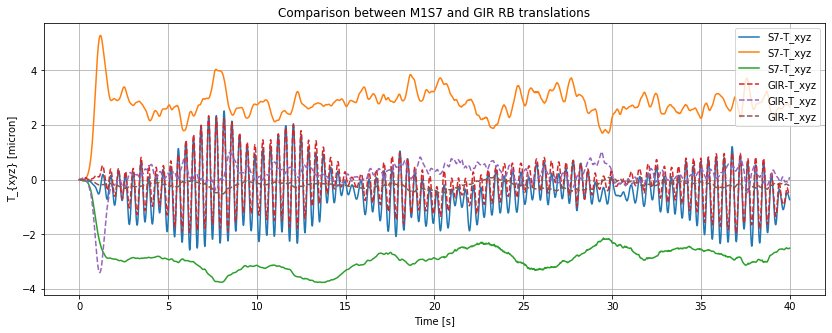

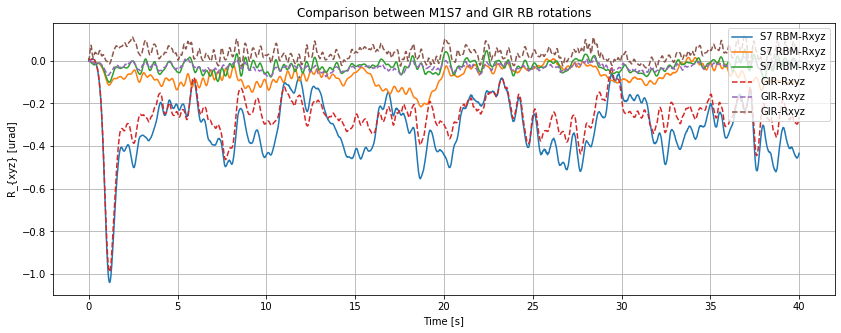

In [92]:
i1,i2 = 0, 39999#14999, 24000
fig,ax = plt.subplots(figsize=(14,5))
ax.plot(t[i1:i2],m1_rbm[i1:i2,36:39]*1e6,label="S7-T_xyz")
ax.plot(t[i1:i2],gir_6d[i1:i2,:3]*1e6,'--',label="GIR-T_xyz")
ax.grid()
ax.set_title("Comparison between M1S7 and GIR RB translations")
ax.set_xlabel("Time [s]")
ax.set_ylabel("T_{xyz} [micron]")
ax.legend(loc="upper right")

fig,ax = plt.subplots(figsize=(14,5))
ax.plot(t[i1:i2],m1_rbm[i1:i2,39:]*1e6,label="S7 RBM-Rxyz")
ax.plot(t[i1:i2],gir_6d[i1:i2,3:]*1e6,'--',label="GIR-Rxyz")
ax.grid()
ax.set_title("Comparison between M1S7 and GIR RB rotations")
ax.set_xlabel("Time [s]")
ax.set_ylabel("R_{xyz} [urad]")
ax.legend(loc="upper right")

/Users/rromano/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


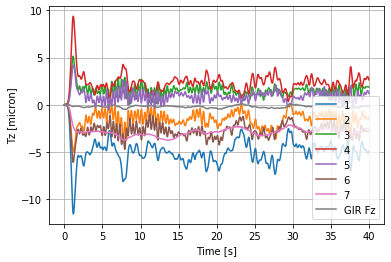

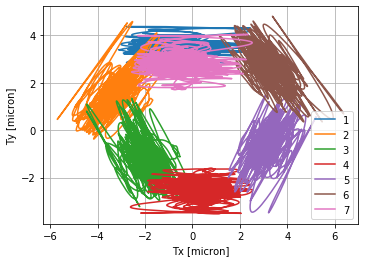

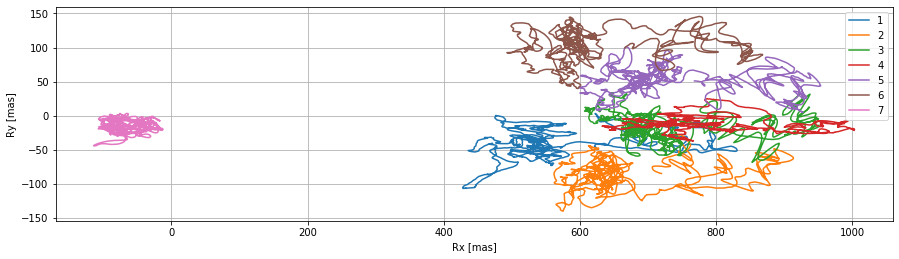

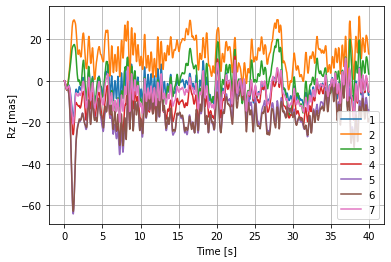

In [4]:
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m1_rbm[:,i*6+2]*1e6,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Tz [micron]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(m1_rbm[5000:,i*6]*1e6,m1_rbm[5000:,i*6+1]*1e6,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Tx [micron]")
ax.set_ylabel("Ty [micron]")
ax.legend()
fig,ax = plt.subplots(figsize=(14,7))
a = 180*3600e3/np.pi
for i in range(7):
    ax.plot(m1_rbm[5000:,i*6+3]*a,m1_rbm[5000:,i*6+4]*a,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Rx [mas]")
ax.set_ylabel("Ry [mas]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m1_rbm[:,i*6+5]*a,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rz [mas]")
ax.legend()

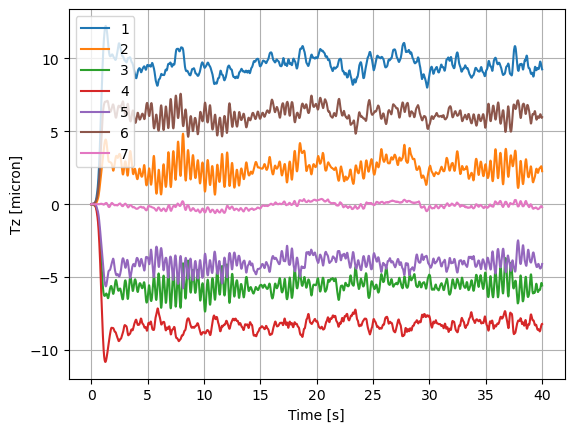

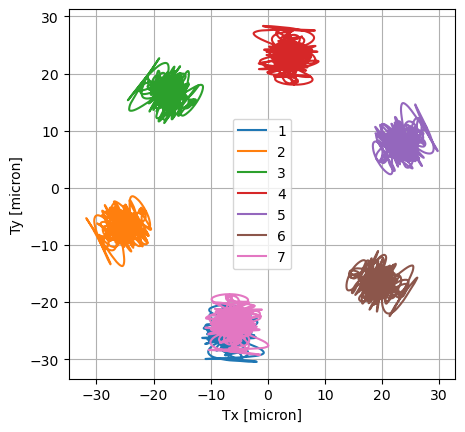

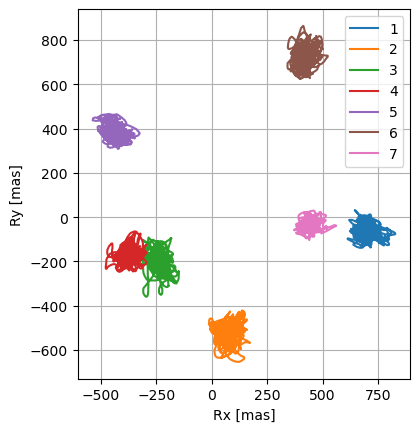

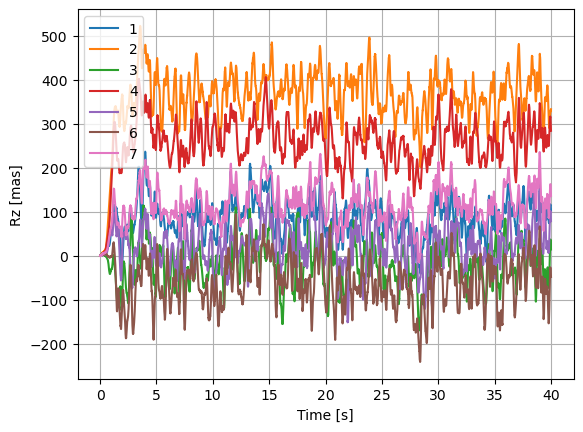

In [62]:
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m2_rbm[:,i*6+2]*1e6,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Tz [micron]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(m2_rbm[5000:,i*6]*1e6,m2_rbm[5000:,i*6+1]*1e6,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Tx [micron]")
ax.set_ylabel("Ty [micron]")
ax.legend()
fig,ax = plt.subplots()
a = 180*3600e3/np.pi
for i in range(7):
    ax.plot(m2_rbm[5000:,i*6+3]*a,m2_rbm[5000:,i*6+4]*a,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Rx [mas]")
ax.set_ylabel("Ry [mas]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m2_rbm[:,i*6+5]*a,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rz [mas]")
ax.legend()

M1 RBM with pointing error compensation

In [55]:
Hk_dt = loadmat('/Users/rromano/Workspace/gmt-data/20230530_1756_zen_30_M1_202110_FSM_202305_Mount_202305_noStairs/Hk_m1m2.mat')

In [56]:

if False:
    Hk_m1 = Hk_dt['Hk_gir_m1m2'][:42,:]
    print('Dimension of M1 compensation for GIR POS:',Hk_m1.shape)
    u = gir_6d

else:
    Hk_m1 = Hk_dt['Hk_mnt_m1m2'][:42,:]
    print('Dimension of M1 compensation for mount ENC pos:',Hk_m1.shape)
    u = mnt_enc_avg
m1_rbm_c = m1_rbm - (Hk_m1[:,:] @ u[:,:].transpose()).transpose()
#Hk_m1[1,2:5]

Dimension of M1 compensation for mount ENC pos: (42, 3)


Text(0.5, 1.0, 'M1 Rz comparison without pointing error contribution')

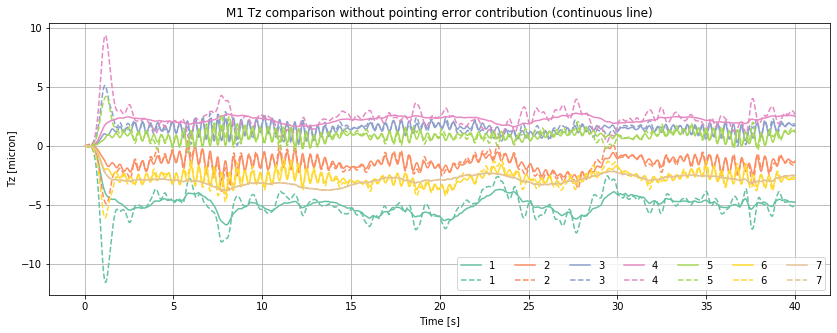

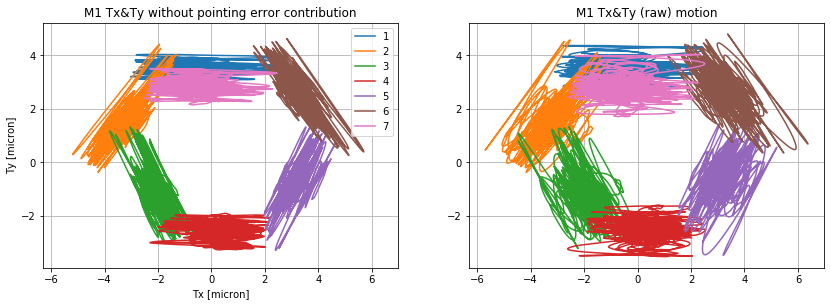

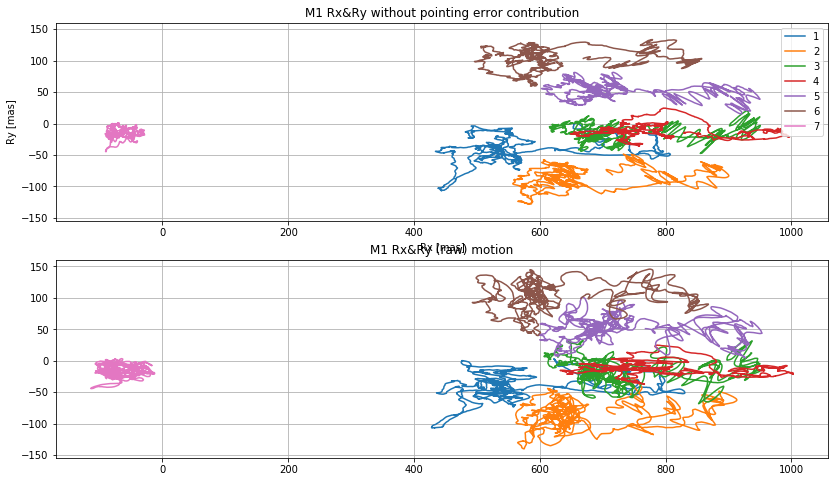

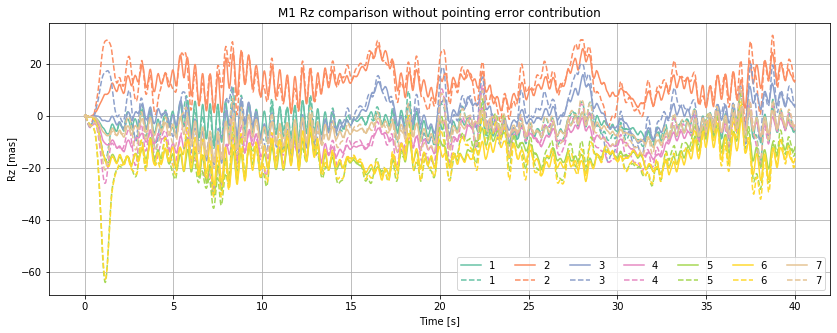

In [60]:
cmap = plt.cm.Set2
fig, ax = plt.subplots(figsize=(14,5))

for i in range(7):
    ax.plot(t,m1_rbm_c[:,i*6+2]*1e6,color = cmap(i/7),label=i+1)
    ax.plot(t,m1_rbm[:,i*6+2]*1e6,'--',color = cmap(i/7),label=i+1)
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Tz [micron]")
ax.set_title("M1 Tz comparison without pointing error contribution (continuous line)")
ax.legend(ncol=7, loc="lower right")

fig,(ax,ax1) = plt.subplots(1,2,figsize=(14,5))
for i in range(7):
    ax.plot(m1_rbm_c[5000:,i*6]*1e6,m1_rbm_c[5000:,i*6+1]*1e6,label=i+1)
    ax1.plot(m1_rbm[5000:,i*6]*1e6,m1_rbm[5000:,i*6+1]*1e6,label=i+1)
ax.grid(), ax1.grid()
ax.set_aspect("equal"), ax1.set_aspect("equal")
ax.set_xlabel("Tx [micron]")
ax.set_ylabel("Ty [micron]")
ax.set_xlim(ax1.get_xlim()), ax.set_ylim(ax1.get_ylim())
ax.legend(loc="upper right")
ax1.set_title("M1 Tx&Ty (raw) motion")
ax.set_title("M1 Tx&Ty without pointing error contribution")

fig,(ax,ax1) = plt.subplots(2,1,figsize=(14,8))
a = 180*3600e3/np.pi
for i in range(7):
    ax.plot(m1_rbm_c[5000:,i*6+3]*a,m1_rbm_c[5000:,i*6+4]*a,label=i+1)
    ax1.plot(m1_rbm[5000:,i*6+3]*a,m1_rbm[5000:,i*6+4]*a,label=i+1)
ax.grid(), ax1.grid()
ax.set_aspect("equal"), ax1.set_aspect("equal")
ax.set_xlim(ax1.get_xlim()), ax.set_ylim(ax1.get_ylim())
ax.set_xlabel("Rx [mas]")
ax.set_ylabel("Ry [mas]")
ax.legend(loc="upper right")
ax1.set_title("M1 Rx&Ry (raw) motion")
ax.set_title("M1 Rx&Ry without pointing error contribution")

fig, ax = plt.subplots(figsize=(14,5))
for i in range(7):
    ax.plot(t,m1_rbm_c[:,i*6+5]*a, color = cmap(i/7),label=i+1)
    ax.plot(t,m1_rbm[:,i*6+5]*a, '--', color = cmap(i/7),label=i+1)
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rz [mas]")
ax.legend(ncol = 7, loc="lower right")
ax.set_title("M1 Rz comparison without pointing error contribution")